![](pro.png)

## From the problem statement, it is assigned to us to build a model which can indentify whether the mashroom is __edible(e)__ or __poisonous(p)__.
## So can say that is a classification problem and __binary classification__ since we only two classes.

### __let's import the required libraies.__


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
warnings.filterwarnings('ignore')



In [38]:
## let's load the dataset

url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv"
data = pd.read_csv(url)

In [39]:
## let's display the header of the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [40]:
## let's see the shape of our dataset
data.shape

(8124, 23)

### We can see that there are 8124 records(rows) and 23 attribute (columns)

In [41]:
## let's display all the columns
pd.options.display.max_columns = None

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Let's first with __EDA__: Exploraory Data Analysis

In [27]:
## let's again check number of classes in  the label (target) column.
data['class'].unique()

array(['p', 'e'], dtype=object)

### It is shows that we have two classes 
### __'p'__ = poisonous.
### __'e'__ = edible 


In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### this description of each column:
### where count = number of records
### unique = number of classes in each column,
### top = the mod of the column
### fred = frequency of the mode 
### It shows also that there no missing values since all the columns have 8124 count values

In [9]:
## let's check if there is missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### this __data.info()__ shows also there is no missing values  and also shows the DataTypes of each column of our dataset.

In [23]:
## let's check the datatype of all the coloumn
pd.options.display.max_rows = None

data.dtypes


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [42]:
## let's see number of classes in each column

for i in data:
    print(data[i].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [45]:
## let's verify again
data['veil-type'].unique()

array(['p'], dtype=object)

### from the above result we can see that column "veil-type" have unique class
### so will delete it because it will no  give any values to our model if we use it.

In [46]:
data.drop('veil-type',axis=1,inplace=True)

In [47]:
data.shape

(8124, 22)

### We see clearly that all the columns of our dataset have  the same __datatype = object__

## ************************************

## We can see that the whole dataset columns doesn't have numeric value, so we will encoder each column.
### Encoder means: (convert text into numbers.)

### Again all the column have alphabet(text )data and we have more columns(23),so we will __label encoder__ to encoder them.

In [48]:
## let's import the libraries
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

In [50]:
for i in data.columns:
    if data[i].dtype =='object':
        data[i] = le.fit_transform(data[i])

In [51]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,2,1,4,2,3,3


### Now  our dataset have numerical value now 

### *********** *********** *********** ***********
### *********** *********** *********** ***********

## let's check pour label data if the classes are balance or not.

#### we know that after labelEncoder p = 1 and e = 0 , so let's plot them using histogram

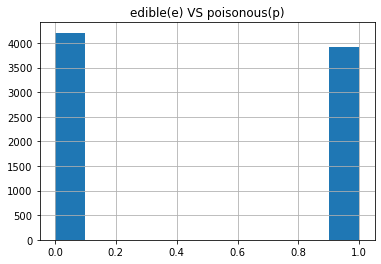

In [58]:

data['class'].hist(grid=True)
plt.title('edible(e) VS poisonous(p)')
plt.show()


### We can see from the histogram that the two classes are almost balance

### *********** *********** *********** ***********
### *********** *********** *********** ***********

## Now let's build our models an check the metrics

In [60]:
# first let's split our dataset into features and label

X = data.drop('class',axis=1)
y = data['class']

In [69]:
#X

In [61]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_RS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(X,y,
                                                    test_size=30,
                                                    random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > max_accu:
        max_accu = acc
        max_RS = i
print('Best accuracy is :',max_accu, 'on Random_state',max_RS)        
    
    

Best accuracy is : 1.0 on Random_state 14


### so now get the best Random_state and it is :14

In [62]:
## let's build gain the model using it

x_train, x_test, y_train,y_test = train_test_split(X,y,
                                                    test_size=30,
                                                    random_state=14)
logr = LogisticRegression()
logr.fit(x_train, y_train)
predictlr = logr.predict(x_test)
print(accuracy_score(y_test, predictlr))
print(confusion_matrix(y_test, predictlr))
print(classification_report(y_test, predictlr))

1.0
[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### We built  the first model using LogisticRegression Algorithum and the accuracy is : 100%

### *********** *********** *********** ***********
### *********** *********** *********** ***********

## let's build a second model using  DecisionTreeClassifier algorithum


In [63]:
## import the libraries
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predict_dt = dt.predict(x_test)
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_dt))
print(classification_report(y_test,predict_dt))

1.0
[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### We built  the Second model using DecisionTreeClassifier Algorithum and the accuracy is : 100%

### *********** *********** *********** ***********
### *********** *********** *********** ***********

## let's build a Third model using  algorithum RandomForestClassifier algorithm



In [66]:
## import the libraries
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predict_rf = rf.predict(x_test)

print(accuracy_score(y_test, predict_rf))
print(confusion_matrix(y_test, predict_rf))
print(classification_report(y_test,predict_rf))

1.0
[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### We built  the Second model using RandomForestClassifier() Algorithum and the accuracy is : 100%

### *********** *********** *********** ***********

# Conclusion: we can say all these 3 algorithum give the same accurary for on our data.

### saving the last model.

In [70]:
import joblib


In [71]:
joblib.dump(rf,"mushrom_model.pkl")

['mushrom_model.pkl']